In [1]:
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import pandas as pd

%matplotlib inline


In [2]:
# print python version
import sys
print(sys.version)


3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]


In [3]:

# Replace 'path_to_fits_file.fits' with the path to your FITS file
# lc = lk.read('/home/preller/h/workspace/astep-tess-targets/astep-tess-targets/toi4409/4409-lightcurve-stitched.fits')
lc = lk.read('./4409-lightcurve-stitched.fits')

# # If the FITS file is a LightCurveFile, you can access the PDCSAP flux (or SAP flux) as a LightCurve object:
# if isinstance(lc_file, lk.LightCurveFile):
#     lc = lc_file.PDCSAP_FLUX

# # If the FITS file is already a LightCurve, then you have the data directly:
# elif isinstance(lc_file, lk.LightCurve):
#     lc = lc_file

FileNotFoundError: [Errno 2] No such file or directory: './4409-lightcurve-stitched.fits'

In [ ]:
type(lc)

lightkurve.lightcurve.TessLightCurve

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

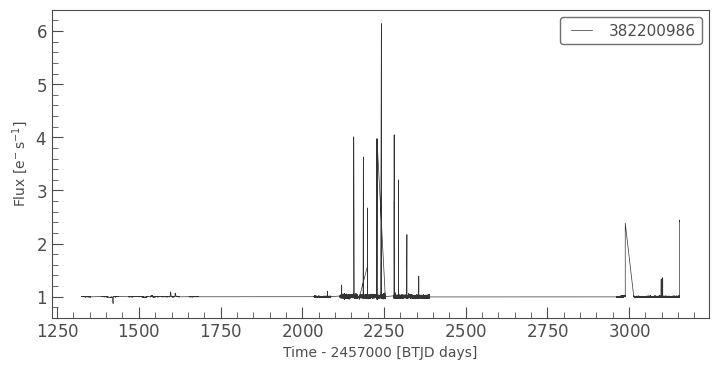

In [ ]:
lc.plot()

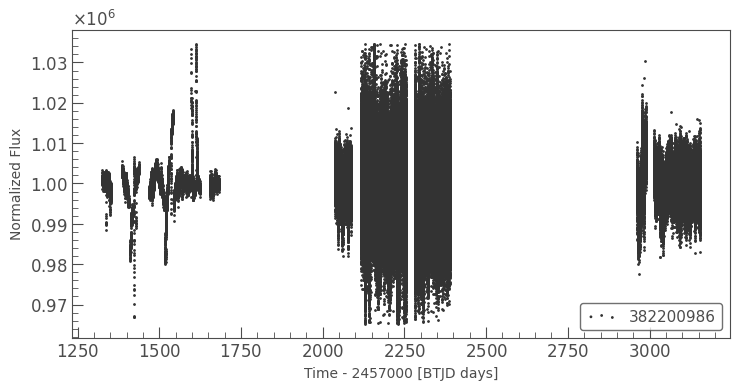

In [ ]:
lc_processed = lc.normalize(unit='ppm').remove_nans().remove_outliers()
lc_processed.scatter();

In [ ]:
# Export the data as a CSV file
# lc_processed.to_csv('toi4409-full-tess-stitched-nonans.csv')

In [ ]:
# Filter the data to reduce size

def filter_data(df, period, t0, offset):
    """
    Filter the DataFrame based on the provided criteria.
    
    Parameters:
    - df: DataFrame containing the lightcurve data
    - period: period of the lightcurve
    - t0: initial time value
    - offset: offset value in days
    
    Returns:
    - A new DataFrame containing the filtered data
    """
    # Calculate the time values that are multiples of the period from t0
    max_time = df['time'].max()
    min_time = df['time'].min()
    periods = [(t0 + period * i) for i in range(int((max_time - t0) / period) + 1) if (t0 + period * i) >= min_time]
    # Print periods
    print(periods)
    
    # Filter the data to keep only rows where the time is within the specified offset of the calculated values
    mask = pd.concat([((df['time'] >= p - offset) & (df['time'] <= p + offset)) for p in periods]).groupby(level=0).any()
    filtered_df = df[mask]
    
    return filtered_df

# Open the csv file
df = pd.read_csv('toi4409-full-tess-stitched-nonans.csv')

# Apply the filter to the original data
# filtered_df = filter_data(df, period=92.492, t0=2076.346853, offset=1)
filtered_df = filter_data(df, period=92.492, t0=41.522853, offset=1) # t0 is now 2076.346853 - 92.492 * 22

filtered_df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'toi4409-full-tess-stitched-nonans.csv'

In [ ]:
all_tess_data = pd.read_csv('./toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted')

FileNotFoundError: [Errno 2] No such file or directory: './toi4409-full-tess-stitched-nonans-filtered1day-sorted_converted'

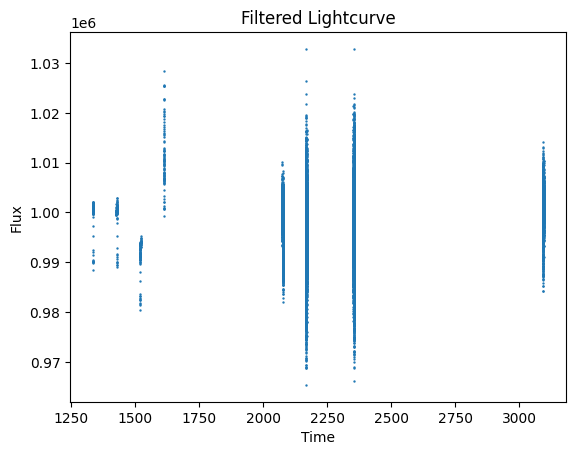

In [ ]:
# Plot the results
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.title('Filtered Lightcurve')
plt.show()


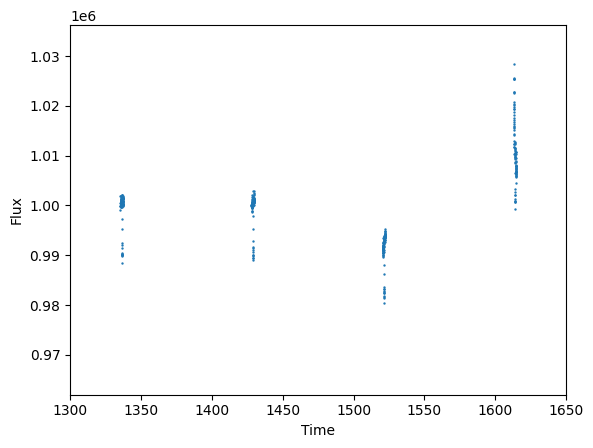

In [ ]:
# Plot only from 1500 to 2000
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlim(1300, 1650)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()


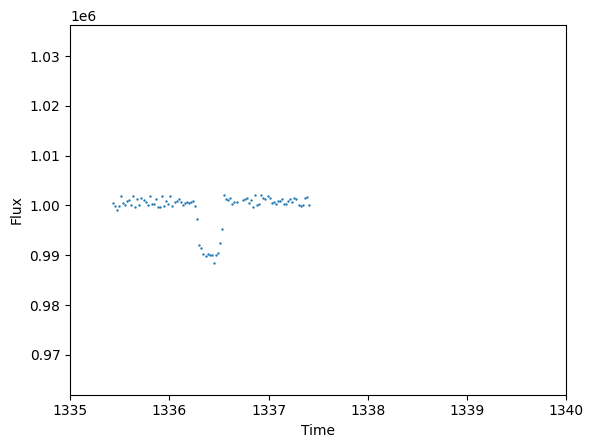

In [ ]:
# Plot only from 1500 to 2000
plt.scatter(filtered_df['time'], filtered_df['flux'], s=0.5)
plt.xlim(1335, 1340)
plt.xlabel('Time')
plt.ylabel('Flux')
plt.show()


In [ ]:
# Sort the csv by the time column
sorted_filtered_df = filtered_df.sort_values(by=['time'], inplace=False)

# Save the filtered data to a csv file
sorted_filtered_df.to_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv', index=False)

In [ ]:
# Open toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv as a df
df = pd.read_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv')

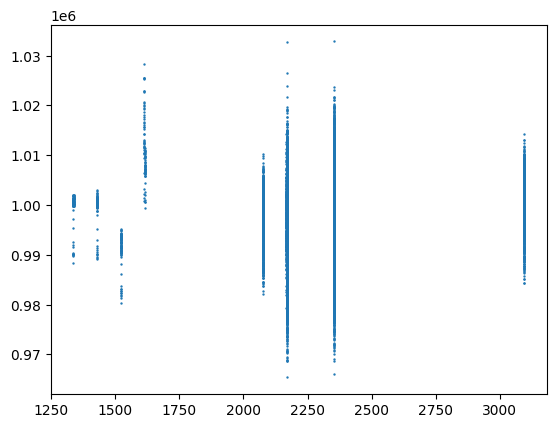

In [ ]:
# Plot the results
plt.scatter(df['time'], df['flux'], s=0.5)

In [ ]:
# For 

In [ ]:
# Check if the time column is sorted
timevals = filtered_df['time']
sortedvals = timevals.sort_values(ascending=True)
print(timevals.equals(sortedvals))

# Print both timevals and sortedvals first 20
print(timevals.head(10))
print(sortedvals.head(10))


False
473    1335.427156
474    1335.447990
475    1335.468824
476    1335.489657
477    1335.510491
478    1335.531325
479    1335.552158
480    1335.572992
481    1335.593826
482    1335.614660
Name: time, dtype: float64
473    1335.427156
474    1335.447990
475    1335.468824
476    1335.489657
477    1335.510491
478    1335.531325
479    1335.552158
480    1335.572992
481    1335.593826
482    1335.614660
Name: time, dtype: float64


In [ ]:
# Extract only 0.5 days around the transit time
t0 = (2459076.346853) + 92.492*0 # BJD, 2076.346853
t1 = t0 - 0.5
t2 = t0 + 0.5

# Use .jd to convert the Time to Julian Date for the comparison
lc_processed_extractedsingle = lc_processed[(lc_processed.time.jd > t1) & (lc_processed.time.jd < t2)]

# Plot the extracted data
lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

NameError: name 'lc_processed' is not defined

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

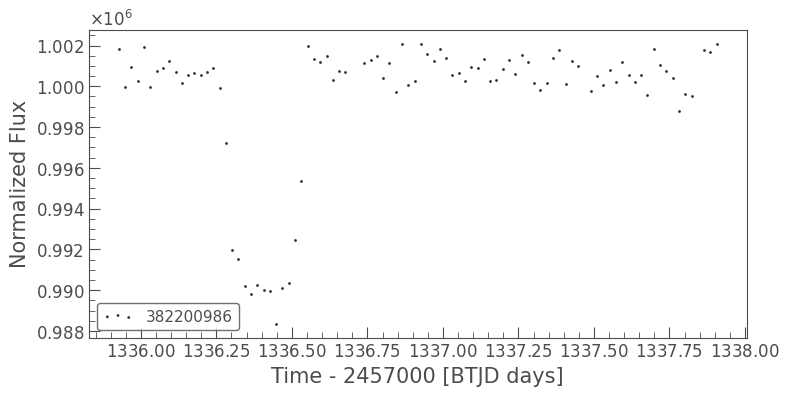

In [ ]:
# Extract only 0.5 days around the transit time
t0 = (2459076.346853) + 92.492*(-8) # BJD, 2076.346853
t1 = t0 - 0.5
t2 = t0 + 1.5

# Use .jd to convert the Time to Julian Date for the comparison
lc_processed_extractedsingle = lc_processed[(lc_processed.time.jd > t1) & (lc_processed.time.jd < t2)]

# Plot the extracted data
lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

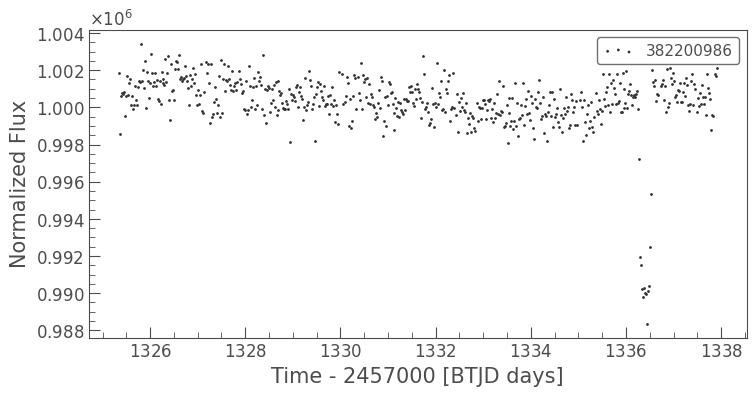

In [ ]:
lc_processed_extractedsingle = lc_processed[lc_processed.time.jd < t2]
# Plot
lc_processed_extractedsingle.scatter()

In [ ]:
# Save this test single initial transit
lc_processed_extractedsingle.to_csv('toi4409-tess-stitched-single-initial-test.csv')

In [ ]:
# Print the type of lc_processed
type(lc_processed)

lightkurve.lightcurve.TessLightCurve

In [ ]:
# Plot the to4409-manual-bin.csv data, load it first
# lc_manual = lk.read('toi4409-manual-bin.csv')
import pandas as pd
# 1. Read the CSV file using pandas
df = pd.read_csv('toi4409-manual-bin.csv')

# 2. Extract the time and flux columns
time = df['time'].values
flux = df['flux'].values

# 3. Create a LightCurve object
lc = lk.LightCurve(time=time, flux=flux)

<Axes: xlabel='Time [JD]', ylabel='Flux'>

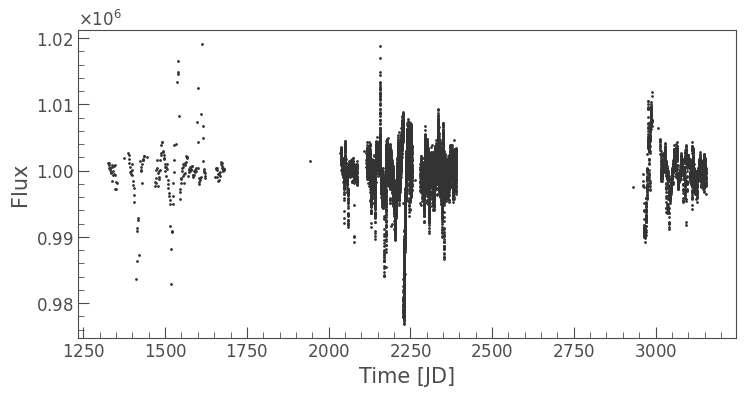

In [ ]:
# 4. Plot the LightCurve
lc.scatter()

In [ ]:
# Load the df
df = pd.read_csv('toi4409

# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

/home/codespace/.python/current/lib/python3.10/site-packages/lightkurve/lightcurve.py:278: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


<Axes: xlabel='Time [JD]', ylabel='Flux'>

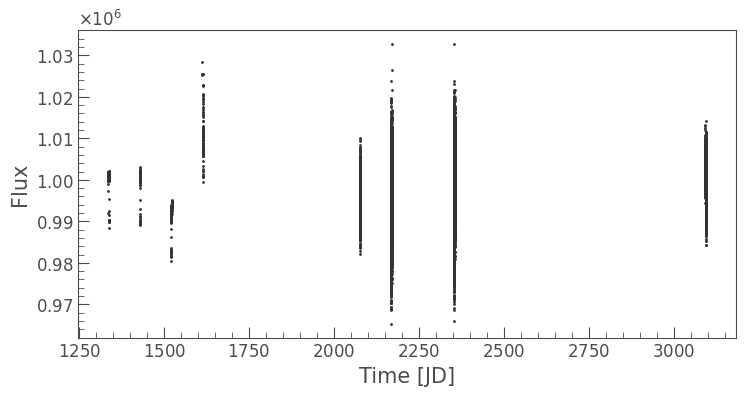

In [ ]:
# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

# Plot the lightcurve
paperprep_lcs.scatter()

/home/codespace/.python/current/lib/python3.10/site-packages/lightkurve/lightcurve.py:278: LightkurveDeprecationWarning: passing flux as a positional argument is deprecated, please use ``flux=...`` instead.
  warnings.warn(


<Axes: xlabel='Time [JD]', ylabel='Flux'>

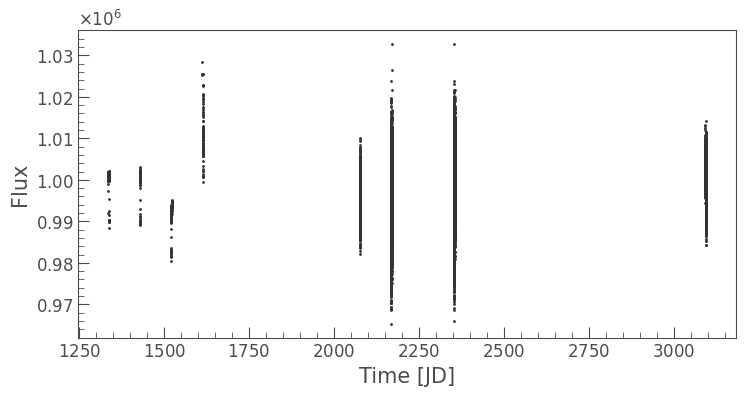

In [ ]:
# df = pd.read_csv('toi4409-full-tess-stitched-nonans.csv')
# # Sort the csv by the time column
# df = filtered_df.sort_values(by=['time'], inplace=False)
df = pd.read_csv('toi4409-full-tess-stitched-nonans-filtered1day-sorted.csv')

# Load the df as a lightcurve
paperprep_lcs = lk.LightCurve(df['time'].values, df['flux'].values, df['flux_err'].values)

# Plot the lightcurve
paperprep_lcs.scatter()

# # Extract only 0.5 days around the transit time
# t0 = (2459076.346853) + 92.492*0 # BJD, 2076.346853
# t1 = t0 - 1000.5
# t2 = t0 + 1000.5

# # Use .jd to convert the Time to Julian Date for the comparison
# lc_processed_extractedsingle = paperprep_lcs[(paperprep_lcs.time.jd > t1) & (paperprep_lcs.time.jd < t2)]

# # Plot the extracted data
# lc_processed_extractedsingle.scatter()

# print lc_processed.time.jd
# print(lc_processed.time.jd)

# print(type(lc_processed.time))

In [ ]:
# import lightkurve as lk
# import numpy as np

def plot_transit_windows(lightcurve, t0, period, times, x):
    """
    Plots the lightcurve data around specific transit windows.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - times: List of integer multipliers for the period.
    - x: Number of days around each transit to display.
    """
    
    # Create a figure
    plt.figure(figsize=(14, 8))
    
    # For each multiplier in times, plot the data around the transit window
    for time_multiplier in times:
        transit_time = t0 + period * time_multiplier
        mask = (lightcurve.time.jd > transit_time - x) & (lightcurve.time.jd < transit_time + x)
        
        # Plot the data within the mask
        plt.errorbar(lightcurve.time[mask].value, lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")

    plt.xlabel('Time (days)')
    plt.ylabel('Flux')
    plt.legend()
    plt.title(f"Lightcurve Data around Transit Windows")
    plt.tight_layout()
    plt.show()

# The function definition is provided, and the sample usage is commented out for reference.
# Uncommenting the below lines will demonstrate the function, but we need a sample lightcurve and parameters for it to work.

# Sample usage:
# paperprep_lcs = lk.LightCurve(data['# time'].values, data['flux'].values, data['flux_err'].values)
# plot_transit_windows(paperprep_lcs, t0=2, period=1, times=[1, 2, 3], x=0.5)


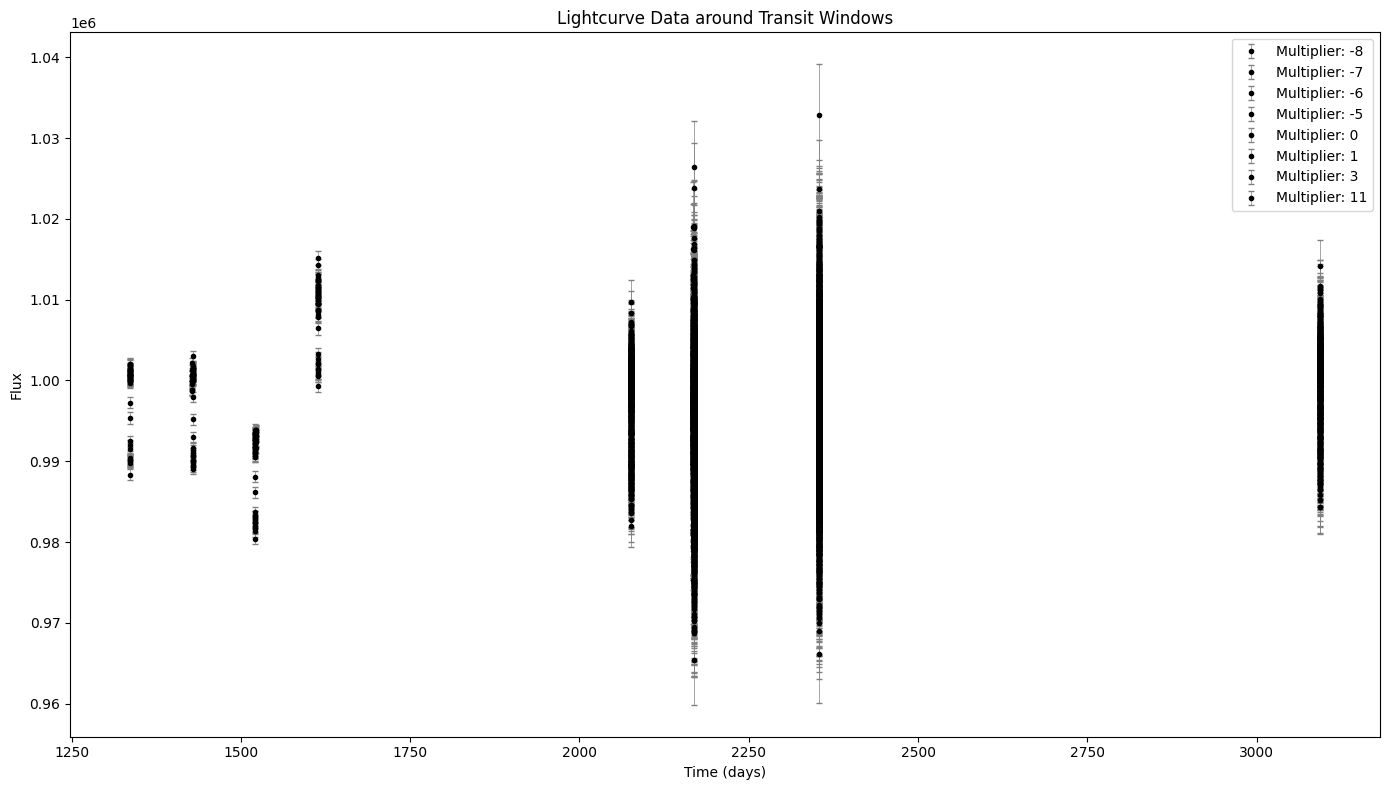

In [ ]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-8, -7, -6, -5, 0, 1, 3, 11], x=0.5)

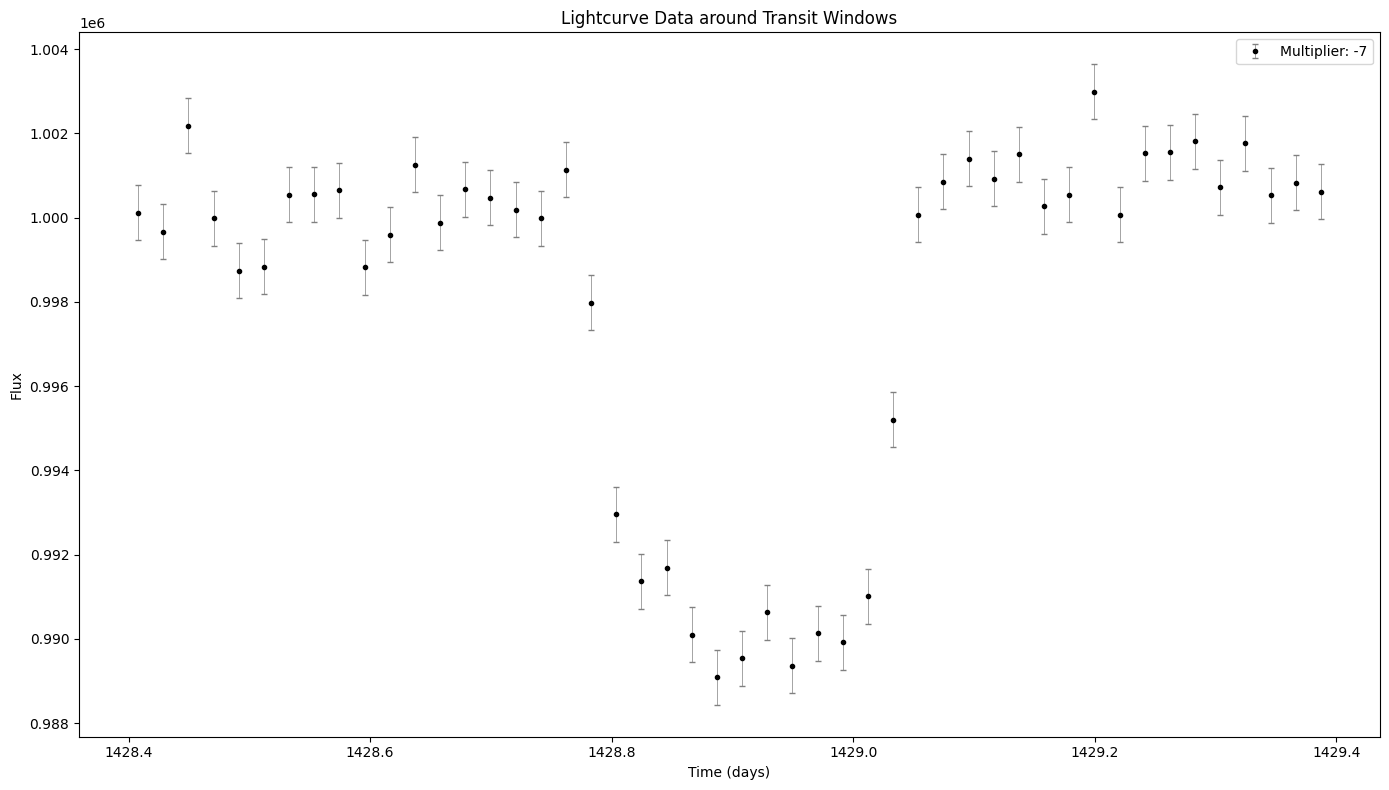

In [ ]:
plot_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, times=[-7], x=0.5)

In [ ]:
def plot_specific_transit_windows(lightcurve, t0, period, x, start_multiplier, end_multiplier):
    """
    Plots the lightcurve data around specific transit windows that have at least one data point inside the specified range.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # For each multiplier in the specified range
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            # Plot the data within the mask in a separate figure
            plt.figure(figsize=(10, 6))
            plt.errorbar(lc_time_jd[mask], lightcurve.flux[mask], yerr=lightcurve.flux_err[mask], fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2, label=f"Multiplier: {time_multiplier}")
            plt.xlabel('Time (JD)')
            plt.ylabel('Flux')
            plt.legend()
            plt.title(f"Lightcurve Data around Transit Window (Multiplier: {time_multiplier})")
            plt.tight_layout()
            plt.show()

# The function definition is provided.
# You can use this function in your environment with the 'lightkurve' library.


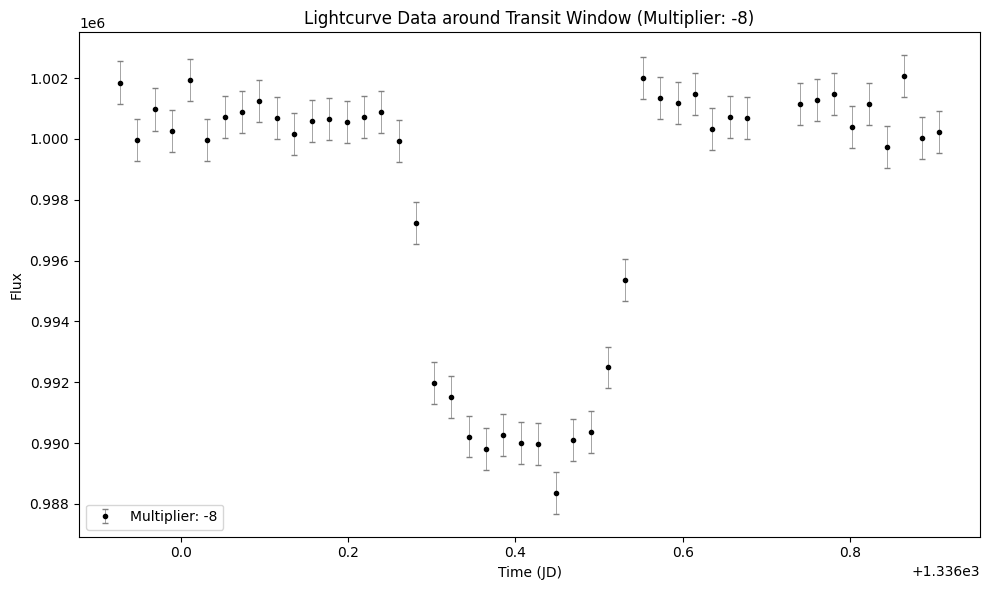

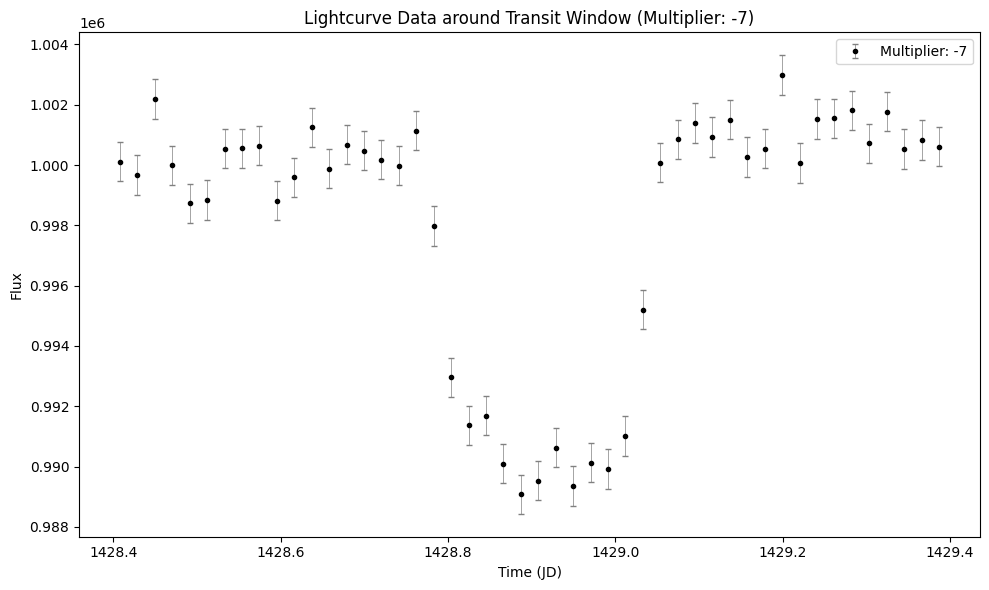

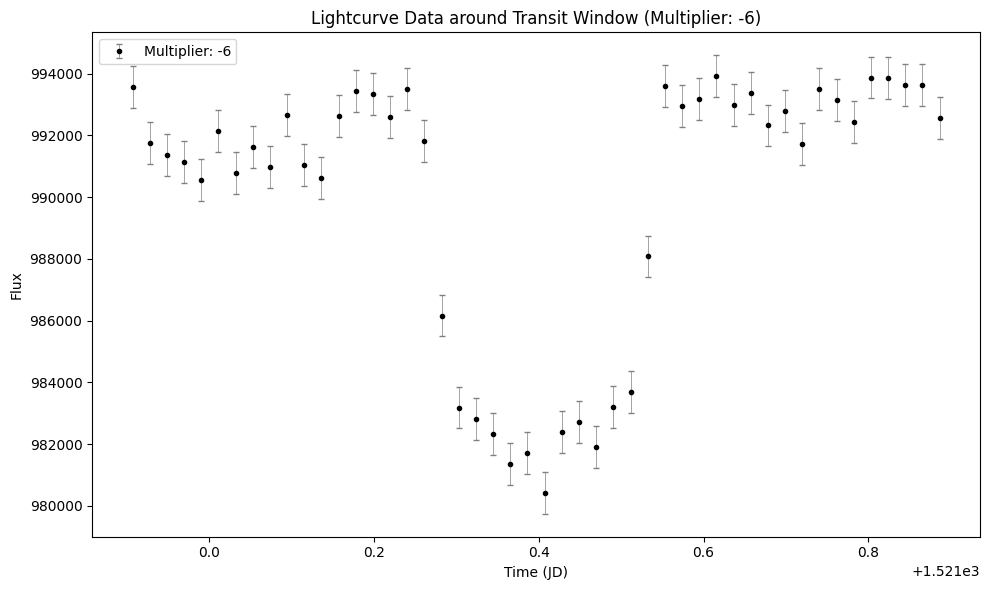

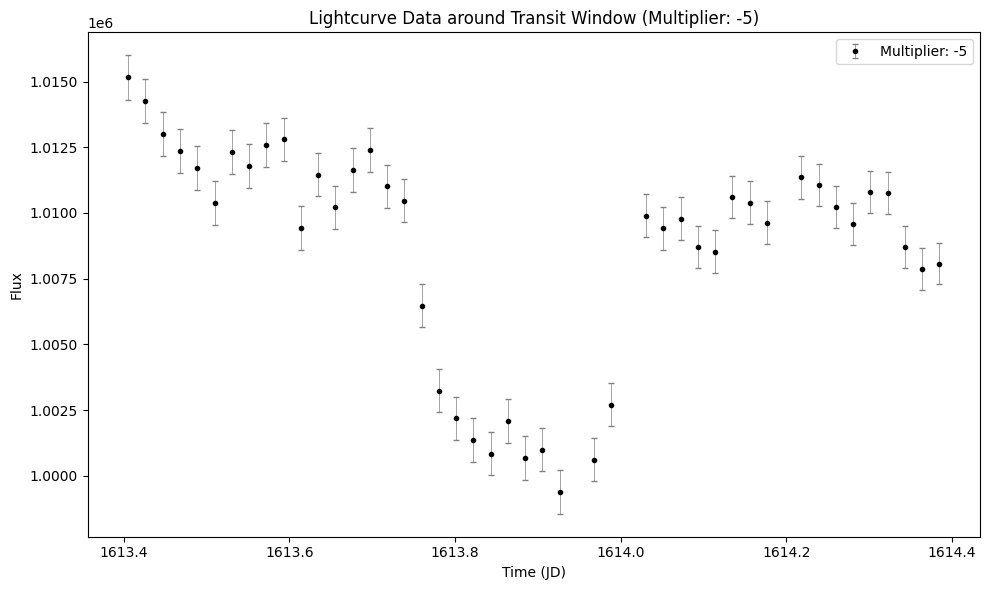

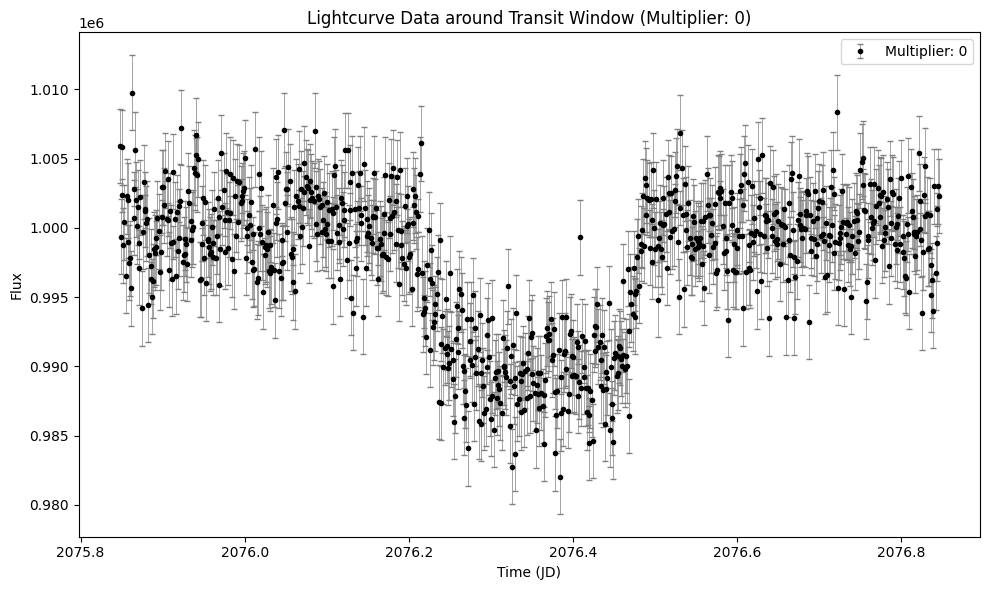

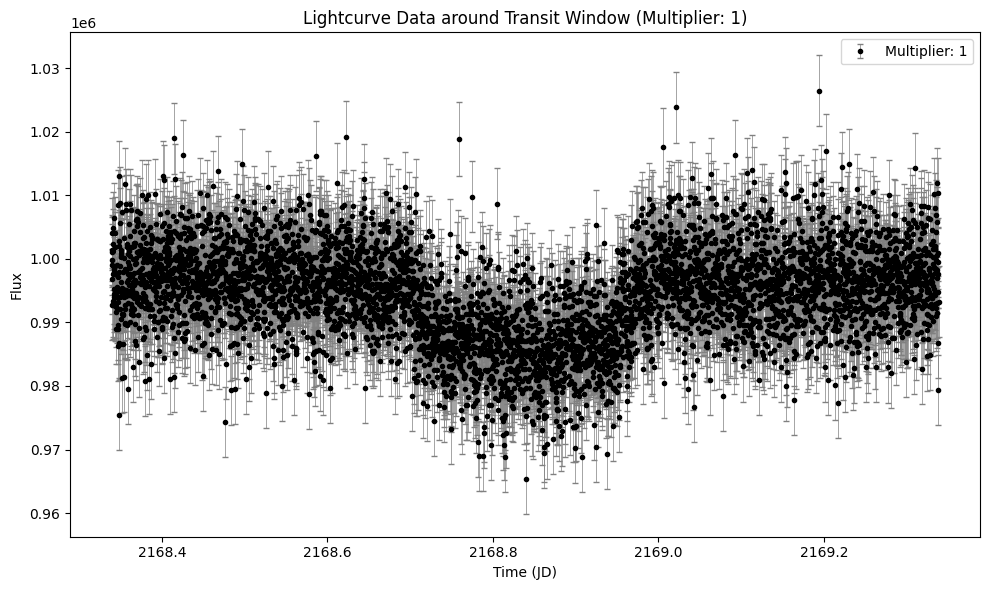

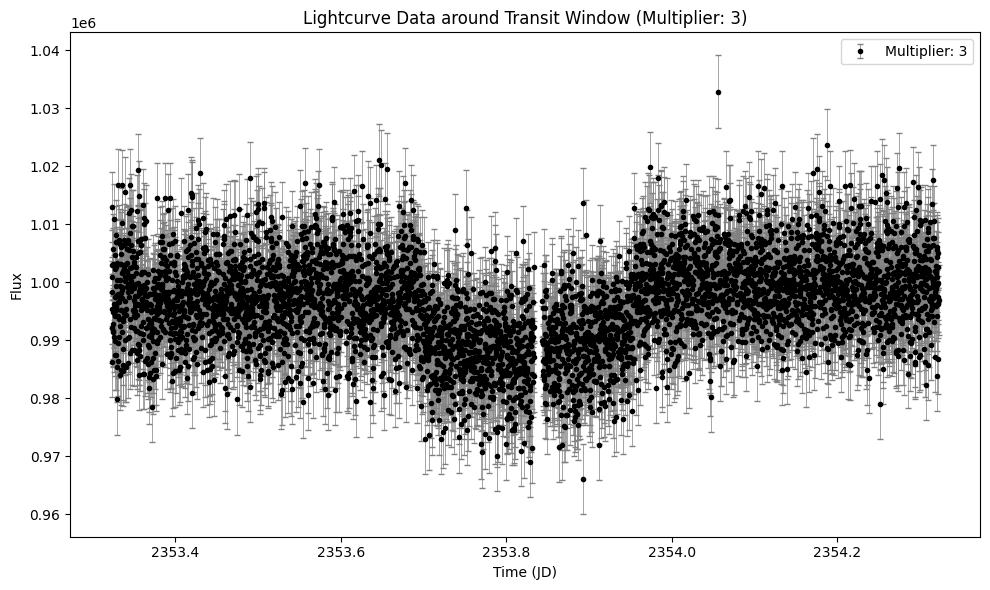

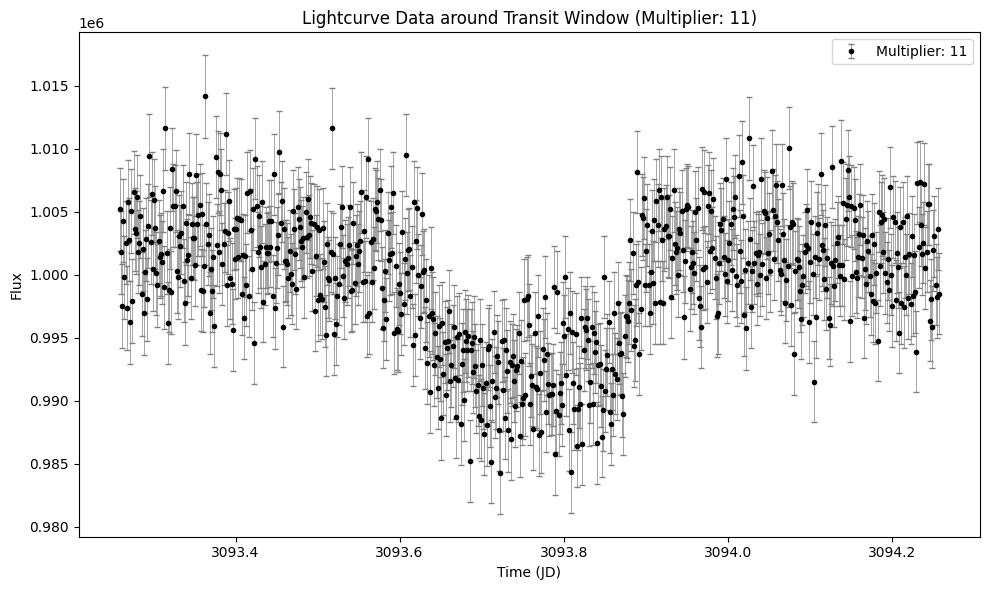

In [ ]:
plot_specific_transit_windows(paperprep_lcs, t0=2076.346853, period=92.492, x=0.5, start_multiplier=-8, end_multiplier=11)

In [ ]:
def fixed_final_plot_transit_windows_grid(lightcurve, t0, period, x, start_multiplier, end_multiplier, 
                                          n_columns, x_label, y_label, y_scale=1, 
                                          subplot_title="", main_title="", save_path=None):
    """
    Plots the lightcurve data around specific transit windows in a grid layout.
    
    Parameters:
    - lightcurve: Lightkurve's LightCurve object.
    - t0: Transit midpoint.
    - period: Orbital period.
    - x: Number of days around each transit to display.
    - start_multiplier: Start of the range of multipliers for the period.
    - end_multiplier: End of the range of multipliers for the period.
    - n_columns: Number of columns for the grid layout.
    - x_label: Label for the x-axis.
    - y_label: Label for the y-axis.
    - y_scale: Scaling factor for the y-axis (default is 1).
    - subplot_title: Title for each subplot (default is empty).
    - main_title: Title for the main plot.
    """
    
    # Convert the lightcurve time to Julian Date for comparison
    lc_time_jd = lightcurve.time.jd
    
    # Collect valid multipliers
    valid_multipliers = []
    
    for time_multiplier in range(start_multiplier, end_multiplier + 1):
        transit_time = t0 + period * time_multiplier
        mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
        
        # Check if there's at least one data point inside the window
        if np.any(mask):
            valid_multipliers.append(time_multiplier)
    
    # Calculate the number of rows for the grid layout
    n_rows = int(np.ceil(len(valid_multipliers) / n_columns))
    
    # Create the grid plot
    fig, axs = plt.subplots(n_rows, n_columns, figsize=(4*n_columns, 4*n_rows))
    
    # Handle the case for single row
    if n_rows == 1:
        axs = np.expand_dims(axs, axis=0)
    
    for i, ax in enumerate(axs.ravel()):
        if i < len(valid_multipliers):
            time_multiplier = valid_multipliers[i]
            transit_time = t0 + period * time_multiplier
            mask = (lc_time_jd > transit_time - x) & (lc_time_jd < transit_time + x)
            
            ax.errorbar(lc_time_jd[mask], lightcurve.flux[mask] / y_scale, yerr=lightcurve.flux_err[mask] / y_scale, fmt='.k', ecolor='gray', elinewidth=0.5, capsize=2)
            ax.set_title(subplot_title)
            ax.set_xlabel(x_label)
            ax.set_ylabel(y_label)
        else:
            ax.axis('off')  # Turn off any additional subplots
    
    # Adjusting suptitle positioning
    plt.suptitle(main_title, y=1.05)
    plt.tight_layout()
    
    # If save path is provided, save the figure
    if save_path:
        plt.savefig(save_path, bbox_inches='tight')
        
    plt.show()

# The fixed function definition is provided.
# You can use this function in your environment with the 'lightkurve' library.


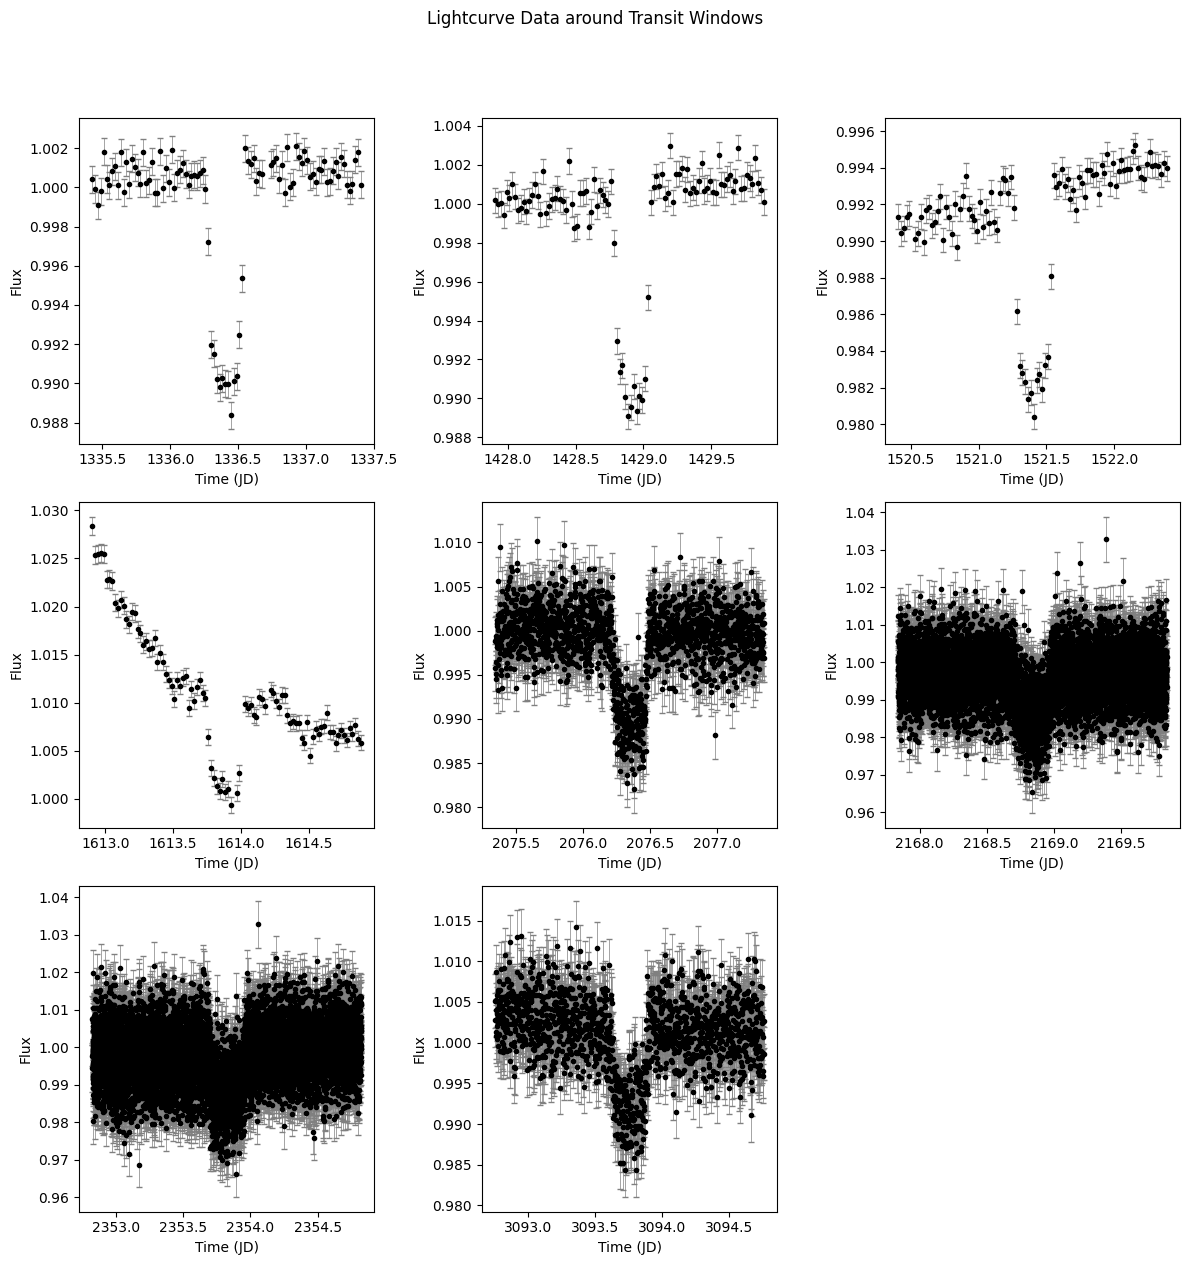

In [ ]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=3, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows.png") 

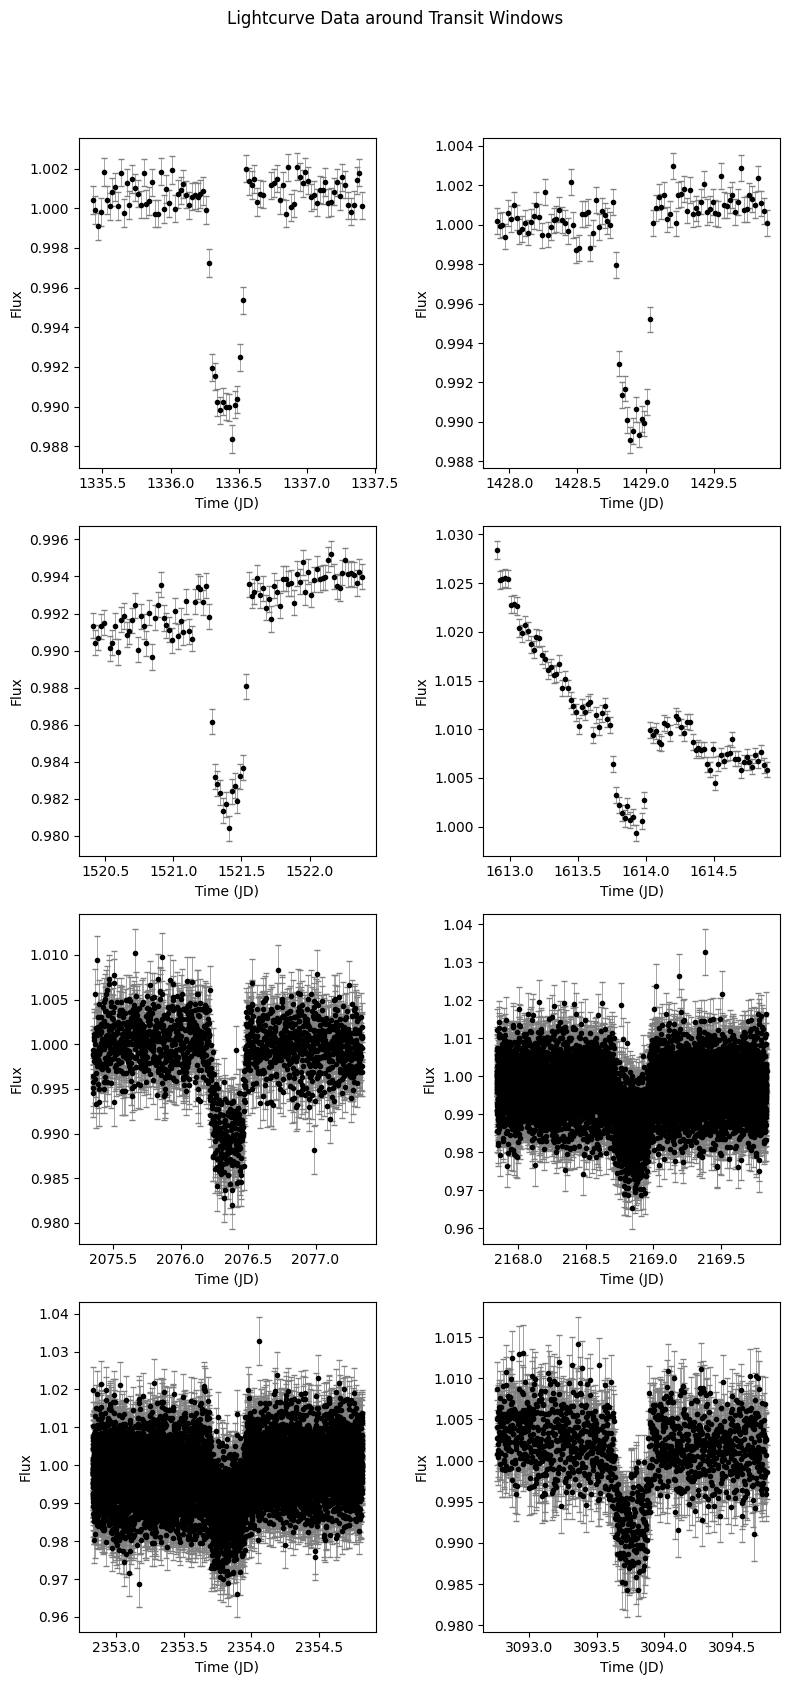

In [ ]:
fixed_final_plot_transit_windows_grid(paperprep_lcs, t0=2076.346853, period=92.492, x=1, start_multiplier=-8, end_multiplier=11, n_columns=2, x_label="Time (JD)", y_label="Flux", subplot_title="", y_scale=10e5,  main_title="Lightcurve Data around Transit Windows", save_path="toi4409-transit-windows-2cols.png") 

In [ ]:
# Save the plot
plt.savefig('toi4409-transit-windows.jpeg')

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Phase [JD]', ylabel='Flux'>

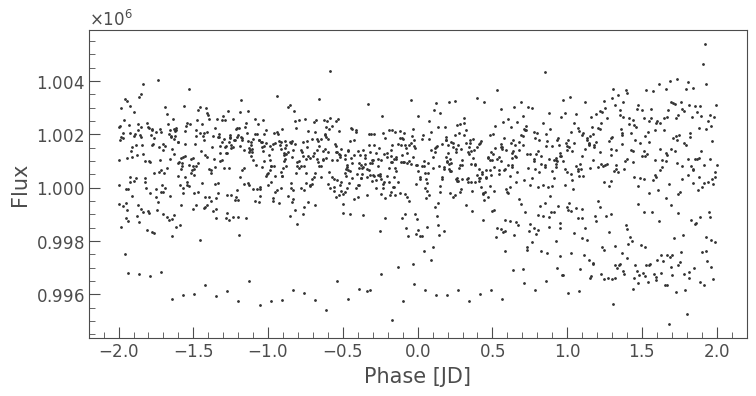

In [ ]:
# Fold this new LightCurve on the period and epoch of the transit
lc_folded_2 = lc.fold(period=92.492, epoch_time=2459076.346853)
# Cut 1 day before and after the transit
lc_folded_2 = lc_folded_2[(lc_folded_2.time < 2) & (lc_folded_2.time > -2)]
lc_folded_2.scatter()

In [42]:
# Print the amount of data points in lc_processed
print(len(lc_processed)) # 1325547 / 25k = 53.xxx = 53

# From lc_processed, make all points an average, so that the data size has a total of 25000 points
lc_processed_binned = lc_processed.bin(binsize=53)
lc_processed_binned.plot();


1325547


/tmp/ipykernel_20238/3870013359.py:5: LightkurveDeprecationWarning: "binsize" was deprecated in version 2.0 and will be removed in a future version. 
        Use time_bin_size instead.
  lc_processed_binned = lc_processed.bin(binsize=53)


ValueError: shape mismatch: value array of shape (27413,) could not be broadcast to indexing result of shape (18448,)

In [43]:
lc_processed_binned

NameError: name 'lc_processed_binned' is not defined

In [ ]:
# Save the binned data as a CSV file
lc_processed_binned.to_csv('toi4409-tess-stitched-binned25k.csv')


In [15]:
# Shift the X axis so that the 2076.346853 value is at 0, without folding, by substacting the value from the time column
# lc_processed_shifted = 

# Plot the shifted data
# lc_processed_shifted.scatter()

AttributeError: object has no attribute shift

In [ ]:
folded = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

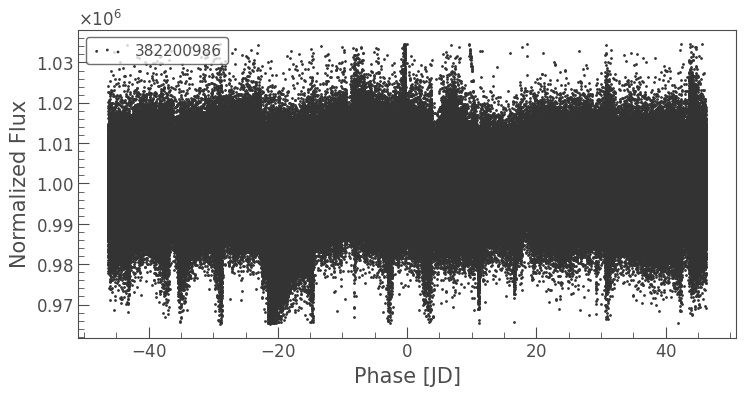

In [ ]:
folded.scatter()

In [ ]:
folded2 = lc_processed.fold(period=92.492, t0=(2459076.346853-2457000)*u.day)

/home/codespace/.python/current/lib/python3.10/site-packages/astropy/utils/decorators.py:604: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

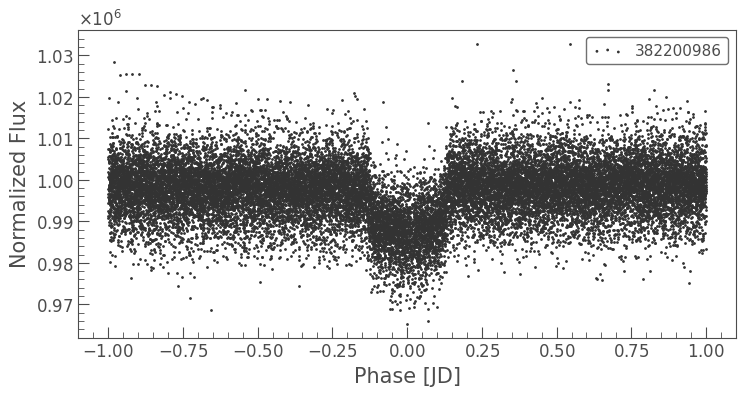

In [ ]:
# Cut data from phase -1 to 1
folded_11 = folded2[(folded2.phase > -1) & (folded2.phase < 1)]
folded_11.scatter()

In [ ]:
# Export the data as a CSV file
folded_11.to_csv('toi4409-tess-folded.csv')

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

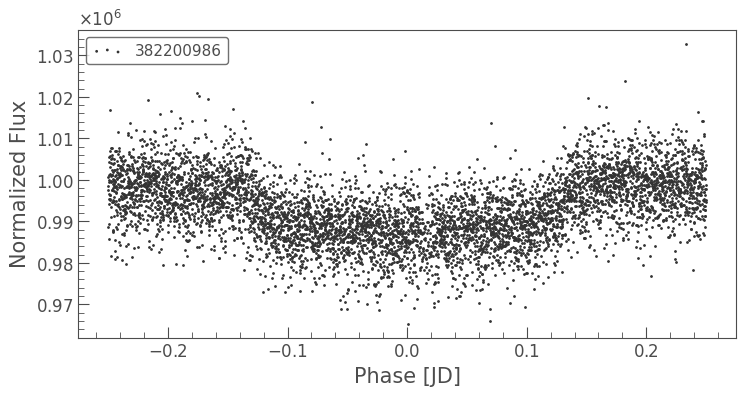

In [ ]:
# Cut the phase from -0.25 to 0.25
folded_025 = folded2[(folded2.phase > -0.25) & (folded2.phase < 0.25)]
folded_025.scatter()


In [ ]:
# Export the data as a CSV file
folded_025.to_csv('toi4409-tess-folded-025.csv')


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

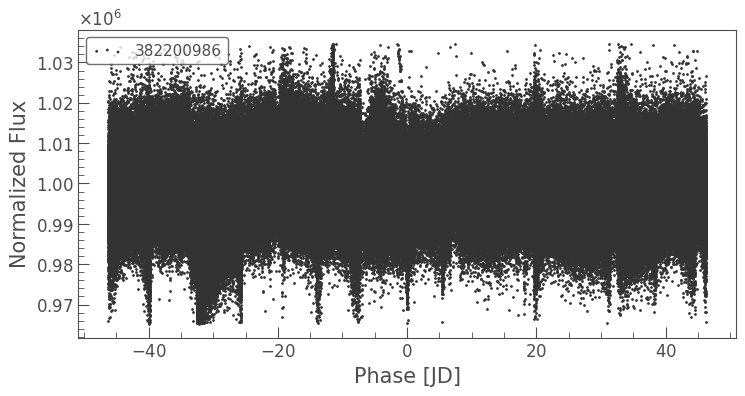

In [ ]:
folded2.scatter()